In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

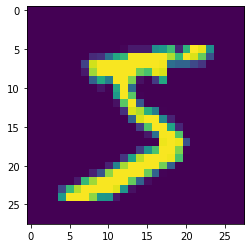

In [4]:
plt.imshow(X_train[0])

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
only_eights = X_train[y_train==8]

In [7]:
only_eights.shape

(5851, 28, 28)

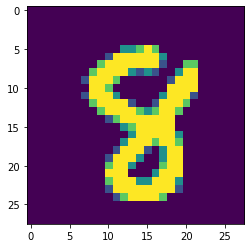

In [8]:
plt.imshow(only_eights[1893])

In [9]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Reshape,Flatten
from tensorflow.keras.models import Sequential

In [10]:
np.random.seed(42)
tf.random.set_seed(42)

codings_size = 100

In [11]:
generator = Sequential()
generator.add(Dense(100, activation="relu", input_shape=[codings_size]))
generator.add(Dense(150,activation='relu'))
generator.add(Dense(784, activation="sigmoid")) # 28*28 = 784
generator.add(Reshape([28,28]))

In [12]:
discriminator = Sequential()
discriminator.add(Flatten(input_shape=[28,28]))
discriminator.add(Dense(150,activation='relu'))
discriminator.add(Dense(100,activation='relu'))
discriminator.add(Dense(1,activation="sigmoid"))

discriminator.compile(loss="binary_crossentropy", optimizer="adam")

In [13]:
GAN = Sequential([generator, discriminator])

In [14]:
discriminator.trainable = False

In [15]:
GAN.compile(loss="binary_crossentropy", optimizer="adam")

In [16]:
GAN.layers

In [17]:
GAN.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 28, 28)            143634    
_________________________________________________________________
sequential_1 (Sequential)    (None, 1)                 132951    
Total params: 276,585
Trainable params: 143,634
Non-trainable params: 132,951
_________________________________________________________________


In [18]:
GAN.layers[0].summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               10100     
_________________________________________________________________
dense_1 (Dense)              (None, 150)               15150     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               118384    
_________________________________________________________________
reshape (Reshape)            (None, 28, 28)            0         
Total params: 143,634
Trainable params: 143,634
Non-trainable params: 0
_________________________________________________________________


In [19]:
GAN.layers[1].summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 150)               117750    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               15100     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 132,951
Trainable params: 0
Non-trainable params: 132,951
_________________________________________________________________


In [20]:
import tensorflow as tf

In [21]:
batch_size = 32

In [22]:
my_data = only_eights

In [23]:
dataset = tf.data.Dataset.from_tensor_slices(my_data).shuffle(buffer_size=1000)

In [24]:
type(dataset)

tensorflow.python.data.ops.dataset_ops.ShuffleDataset

In [25]:
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

In [33]:
epochs = 10

In [34]:
generator, discriminator = GAN.layers

for epoch in range(epochs):
    print(f"Epoch: {epoch+1}")
    i = 0
    for X_batch in dataset:
        i=i+1
        if i%100 == 0:
            print(f"Batch number {i} of {len(my_data)//batch_size}")
    
        noise = tf.random.normal(shape=[batch_size, codings_size])
        gen_images = generator(noise)
        X_fake_vs_real = tf.concat([gen_images, tf.dtypes.cast(X_batch,tf.float32)], axis=0)
        y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)
        discriminator.trainable = True
        discriminator.train_on_batch(X_fake_vs_real, y1)        
        noise = tf.random.normal(shape=[batch_size, codings_size])        
        y2 = tf.constant([[1.]] * batch_size)        
        discriminator.trainable = False
        GAN.train_on_batch(noise, y2)
        
print("TRAINING COMPLETE")            

Epoch: 1
Batch number 100 of 182
Epoch: 2
Batch number 100 of 182
Epoch: 3
Batch number 100 of 182
Epoch: 4
Batch number 100 of 182
Epoch: 5
Batch number 100 of 182
Epoch: 6
Batch number 100 of 182
Epoch: 7
Batch number 100 of 182
Epoch: 8
Batch number 100 of 182
Epoch: 9
Batch number 100 of 182
Epoch: 10
Batch number 100 of 182
TRAINING COMPLETE


In [35]:
noise = tf.random.normal(shape=[10, codings_size])

In [36]:
noise.shape

TensorShape([10, 100])

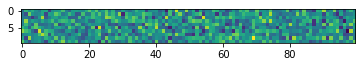

In [37]:
plt.imshow(noise)

In [38]:
image = generator(noise)

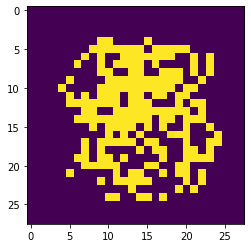

In [39]:
plt.imshow(image[2])